# Data Collecting

In [1]:
import cml.data_v1 as cmldata

CONNECTION_NAME = "btpn-poc-lake"
conn = cmldata.get_connection(CONNECTION_NAME)
spark = conn.get_spark_session()

attrition = spark.sql(
    """
    SELECT * FROM cml_datasources.hr_ext_employee_attrition a
    """
)

Setting spark.hadoop.yarn.resourcemanager.principal to auth0634ccb4ddaae663bfff36075
Hive Session ID = 9fd02b6b-0393-4247-92d5-25b104c899bb


In [2]:
attrition.printSchema()

root
 |-- age: long (nullable = true)
 |-- attrition: string (nullable = true)
 |-- businesstravel: string (nullable = true)
 |-- dailyrate: long (nullable = true)
 |-- department: string (nullable = true)
 |-- distancefromhome: long (nullable = true)
 |-- education: long (nullable = true)
 |-- educationfield: string (nullable = true)
 |-- employeecount: boolean (nullable = true)
 |-- employeenumber: long (nullable = true)
 |-- environmentsatisfaction: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- hourlyrate: long (nullable = true)
 |-- jobinvolvement: long (nullable = true)
 |-- joblevel: long (nullable = true)
 |-- jobrole: string (nullable = true)
 |-- jobsatisfaction: long (nullable = true)
 |-- maritalstatus: string (nullable = true)
 |-- monthlyincome: long (nullable = true)
 |-- monthlyrate: long (nullable = true)
 |-- numcompaniesworked: long (nullable = true)
 |-- over18: string (nullable = true)
 |-- overtime: string (nullable = true)
 |-- percentsalaryhik

In [3]:
df = attrition.toPandas()

In [4]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,NaN,Attrition,BusinessTravel,NaN,Department,NaN,NaN,EducationField,None,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,None,1.0,...,1.0,80.0,None,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,None,2.0,...,4.0,80.0,None,10.0,3.0,3.0,10.0,7.0,1.0,7.0
3,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,None,4.0,...,2.0,80.0,None,7.0,3.0,3.0,0.0,0.0,0.0,0.0
4,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,None,5.0,...,3.0,80.0,None,8.0,3.0,3.0,8.0,7.0,3.0,0.0


# Data Preprocessing

In [5]:
# Import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [6]:
df.drop(0, axis=0, inplace=True)

In [7]:
# display data summary
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,None,1.0,...,1.0,80.0,None,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,None,2.0,...,4.0,80.0,None,10.0,3.0,3.0,10.0,7.0,1.0,7.0
3,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,None,4.0,...,2.0,80.0,None,7.0,3.0,3.0,0.0,0.0,0.0,0.0
4,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,None,5.0,...,3.0,80.0,None,8.0,3.0,3.0,8.0,7.0,3.0,0.0
5,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,None,7.0,...,4.0,80.0,None,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [8]:
# Showing the sum of rows and columns
df.shape

(1470, 35)

In [9]:
# showing feature name
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [10]:
# showing the data types
df.dtypes

age                         float64
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome            float64
education                   float64
educationfield               object
employeecount                object
employeenumber              float64
environmentsatisfaction     float64
gender                       object
hourlyrate                  float64
jobinvolvement              float64
joblevel                    float64
jobrole                      object
jobsatisfaction             float64
maritalstatus                object
monthlyincome               float64
monthlyrate                 float64
numcompaniesworked          float64
over18                       object
overtime                     object
percentsalaryhike           float64
performancerating           float64
relationshipsatisfaction    float64
standardhours               float64
stockoptionlevel            

In [11]:
# showing descriptive statistic
df.describe()

,age,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,standardhours,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# checking duplicates data
df.duplicated().sum()

0

In [13]:
# checking missing values
df.isnull().sum()

age                            0
attrition                      0
businesstravel                 0
dailyrate                      0
department                     0
distancefromhome               0
education                      0
educationfield                 0
employeecount               1470
employeenumber                 0
environmentsatisfaction        0
gender                         0
hourlyrate                     0
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                  0
monthlyincome                  0
monthlyrate                    0
numcompaniesworked             0
over18                         0
overtime                       0
percentsalaryhike              0
performancerating              0
relationshipsatisfaction       0
standardhours                  0
stockoptionlevel            1470
totalworkingyears              0
trainingtimeslastyear          0
worklifeba

In [14]:
# checking data information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1470 non-null   float64
 1   attrition                 1470 non-null   object 
 2   businesstravel            1470 non-null   object 
 3   dailyrate                 1470 non-null   float64
 4   department                1470 non-null   object 
 5   distancefromhome          1470 non-null   float64
 6   education                 1470 non-null   float64
 7   educationfield            1470 non-null   object 
 8   employeecount             0 non-null      object 
 9   employeenumber            1470 non-null   float64
 10  environmentsatisfaction   1470 non-null   float64
 11  gender                    1470 non-null   object 
 12  hourlyrate                1470 non-null   float64
 13  jobinvolvement            1470 non-null   float64
 14  joblevel

In [15]:
# chceking numerical features

categorical_numerik = df[['education', 'environmentsatisfaction', 'jobinvolvement', 
                       'jobsatisfaction', 'performancerating', 'relationshipsatisfaction', 
                       'worklifebalance']]
categorical_numerik

,education,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction,worklifebalance
1,2.0,2.0,3.0,4.0,3.0,1.0,1.0
2,1.0,3.0,2.0,2.0,4.0,4.0,3.0
3,2.0,4.0,2.0,3.0,3.0,2.0,3.0
4,4.0,4.0,3.0,3.0,3.0,3.0,3.0
5,1.0,1.0,3.0,2.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...
1466,2.0,3.0,4.0,4.0,3.0,3.0,3.0
1467,1.0,4.0,2.0,1.0,3.0,1.0,3.0
1468,3.0,2.0,4.0,2.0,4.0,2.0,3.0
1469,3.0,4.0,2.0,2.0,3.0,4.0,2.0


In [16]:
# replace education value into categorical
df['education'] = df['education'].replace([1,2,3,4,5], 
                                          ['Below College','College','Bachelor','Master','Doctor'])

# replace EnvironmentSatisfaction value into categorical
df['environmentsatisfaction'] = df['environmentsatisfaction'].replace([1,2,3,4], 
                                          ['Low','Medium','High','Very High'])

# replace JobSatisfaction value into categorical
df['jobinvolvement'] = df['jobinvolvement'].replace([1,2,3,4], 
                                          ['Low','Medium','High','Very High'])

# replace JobSatisfaction value into categorical
df['jobsatisfaction'] = df['jobsatisfaction'].replace([1,2,3,4], 
                                          ['Low','Medium','High','Very High'])

# replace PerformanceRating value into categorical
df['performancerating'] = df['performancerating'].replace([1,2,3,4], 
                                          ['Low','Good','Excellent','Outstanding'])

# replace RelationshipSatisfaction value into categorical
df['relationshipsatisfaction'] = df['relationshipsatisfaction'].replace([1,2,3,4], 
                                          ['Low','Medium','High','Very High'])

# replace WorkLifeBalance value into categorical
df['worklifebalance'] = df['worklifebalance'].replace([1,2,3,4], 
                                          ['Bad','Good','Better','Best'])

In [17]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,College,Life Sciences,None,1.0,...,Low,80.0,None,8.0,0.0,Bad,6.0,4.0,0.0,5.0
2,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,Below College,Life Sciences,None,2.0,...,Very High,80.0,None,10.0,3.0,Better,10.0,7.0,1.0,7.0
3,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,College,Other,None,4.0,...,Medium,80.0,None,7.0,3.0,Better,0.0,0.0,0.0,0.0
4,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,Master,Life Sciences,None,5.0,...,High,80.0,None,8.0,3.0,Better,8.0,7.0,3.0,0.0
5,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,Below College,Medical,None,7.0,...,Very High,80.0,None,6.0,3.0,Better,2.0,2.0,2.0,2.0


# Exploratory Data Analysis

visualisasi yang diinterpretasikan.

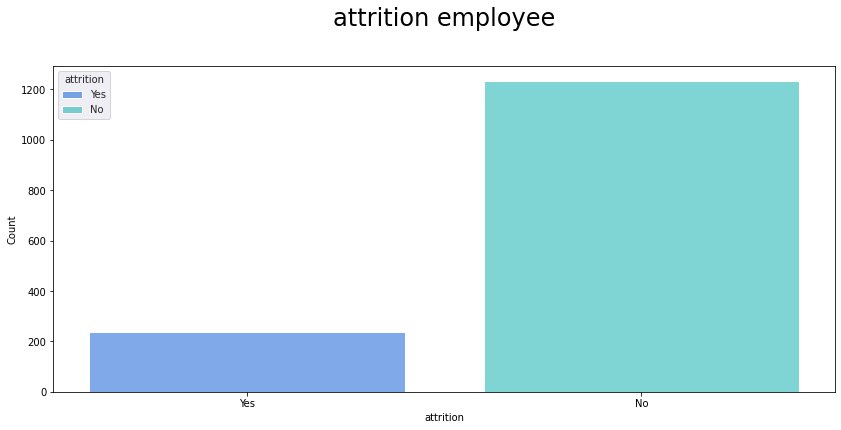

In [18]:
# visualize data distribution of target data (Attrition) 

plt.figure(figsize=(14,6))
plt.title('attrition employee', fontsize=24, pad=40)
sns.set_style('darkgrid')
sns.histplot(data=df,
             x=df['attrition'],
             hue=df['attrition'],
             palette='winter',
             shrink=.8
             );

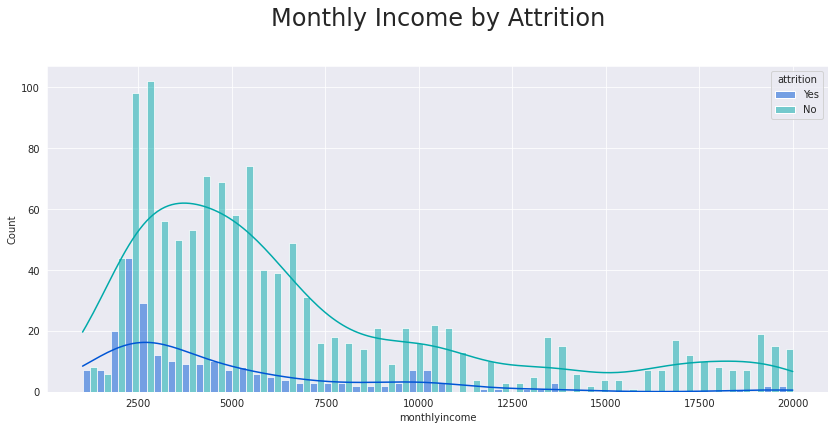

In [19]:
# visualize realtion between monthly income and attrition
plt.figure(figsize=(14,6))
plt.title('Monthly Income by Attrition', fontsize=24, pad=40)
sns.set_style('darkgrid')
sns.histplot(data=df,
             x=df['monthlyincome'],
             hue=df['attrition'],
             palette='winter',
             multiple="dodge",
            #  shrink=.8,
             kde=True,
             bins=50
             );

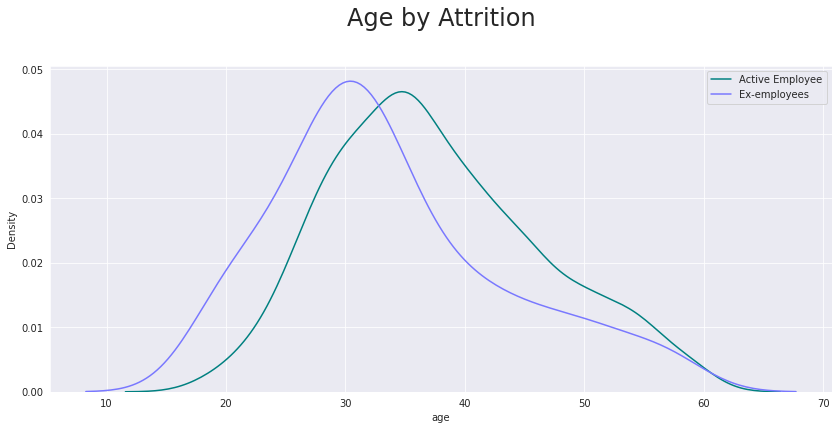

In [20]:
# visualize realtion between age and attrition

plt.figure(figsize=(14,6))
plt.title('Age by Attrition', fontsize=24, pad=40)
sns.set_style('darkgrid')
sns.kdeplot(df.loc[df['attrition'] == 'No', 'age'], label = 'Active Employee', color='teal')
sns.kdeplot(df.loc[df['attrition'] == 'Yes', 'age'], label = 'Ex-employees', color='#7978FF')
plt.legend()
plt.show()

In [21]:
#Dropping Monthly and Daily Rate
df = df.drop(['monthlyrate', 'dailyrate', 'hourlyrate', 'employeecount', 'stockoptionlevel'], axis=1)
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,...,performancerating,relationshipsatisfaction,standardhours,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1,41.0,Yes,Travel_Rarely,Sales,1.0,College,Life Sciences,1.0,Medium,Female,...,Excellent,Low,80.0,8.0,0.0,Bad,6.0,4.0,0.0,5.0
2,49.0,No,Travel_Frequently,Research & Development,8.0,Below College,Life Sciences,2.0,High,Male,...,Outstanding,Very High,80.0,10.0,3.0,Better,10.0,7.0,1.0,7.0
3,37.0,Yes,Travel_Rarely,Research & Development,2.0,College,Other,4.0,Very High,Male,...,Excellent,Medium,80.0,7.0,3.0,Better,0.0,0.0,0.0,0.0
4,33.0,No,Travel_Frequently,Research & Development,3.0,Master,Life Sciences,5.0,Very High,Female,...,Excellent,High,80.0,8.0,3.0,Better,8.0,7.0,3.0,0.0
5,27.0,No,Travel_Rarely,Research & Development,2.0,Below College,Medical,7.0,Low,Male,...,Excellent,Very High,80.0,6.0,3.0,Better,2.0,2.0,2.0,2.0


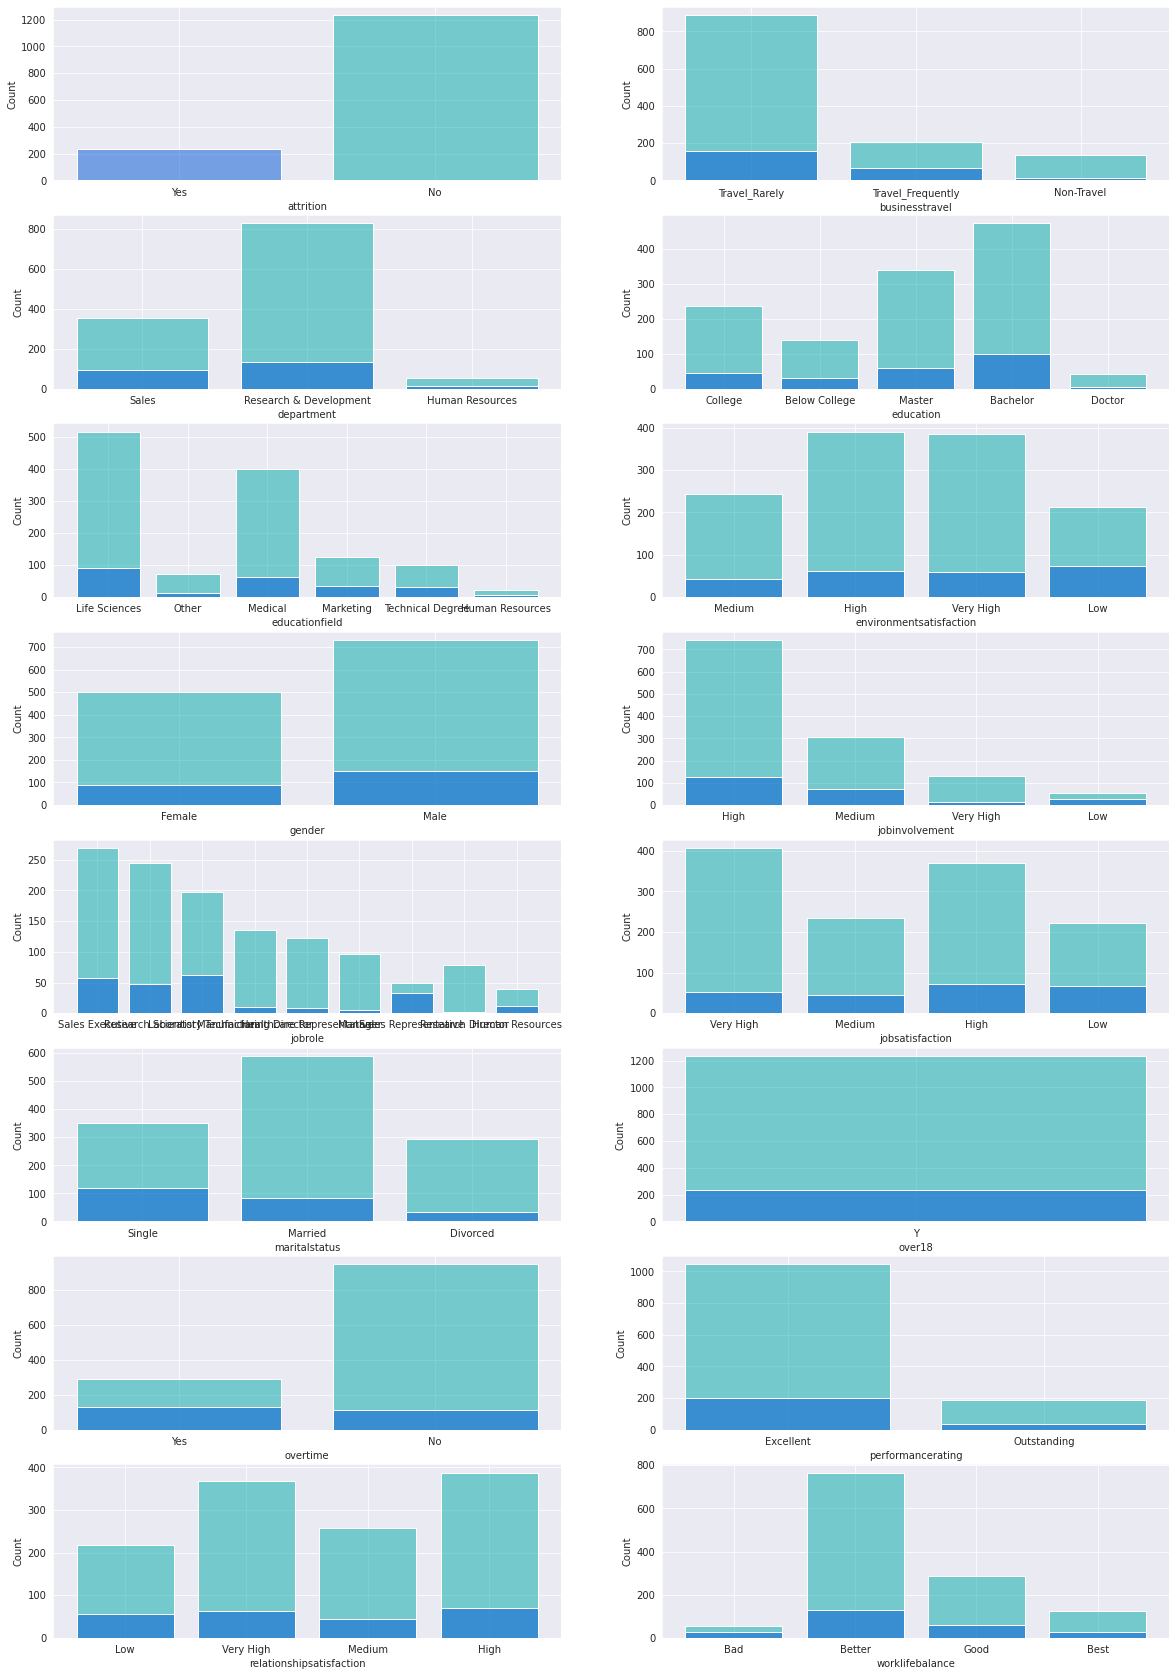

In [22]:
data = 0

fig, ax = plt.subplots(8,2, figsize=(20,30))
sns.set_style('darkgrid')
ax = ax.flatten()

for i in df.columns[df.dtypes=='object']:
  sns.histplot(data=df,
               x=df[i],
               hue=df['attrition'],
               shrink=.8,
               palette='winter',
               legend=False,
               ax = ax[data]
               );
  
  data=data+1

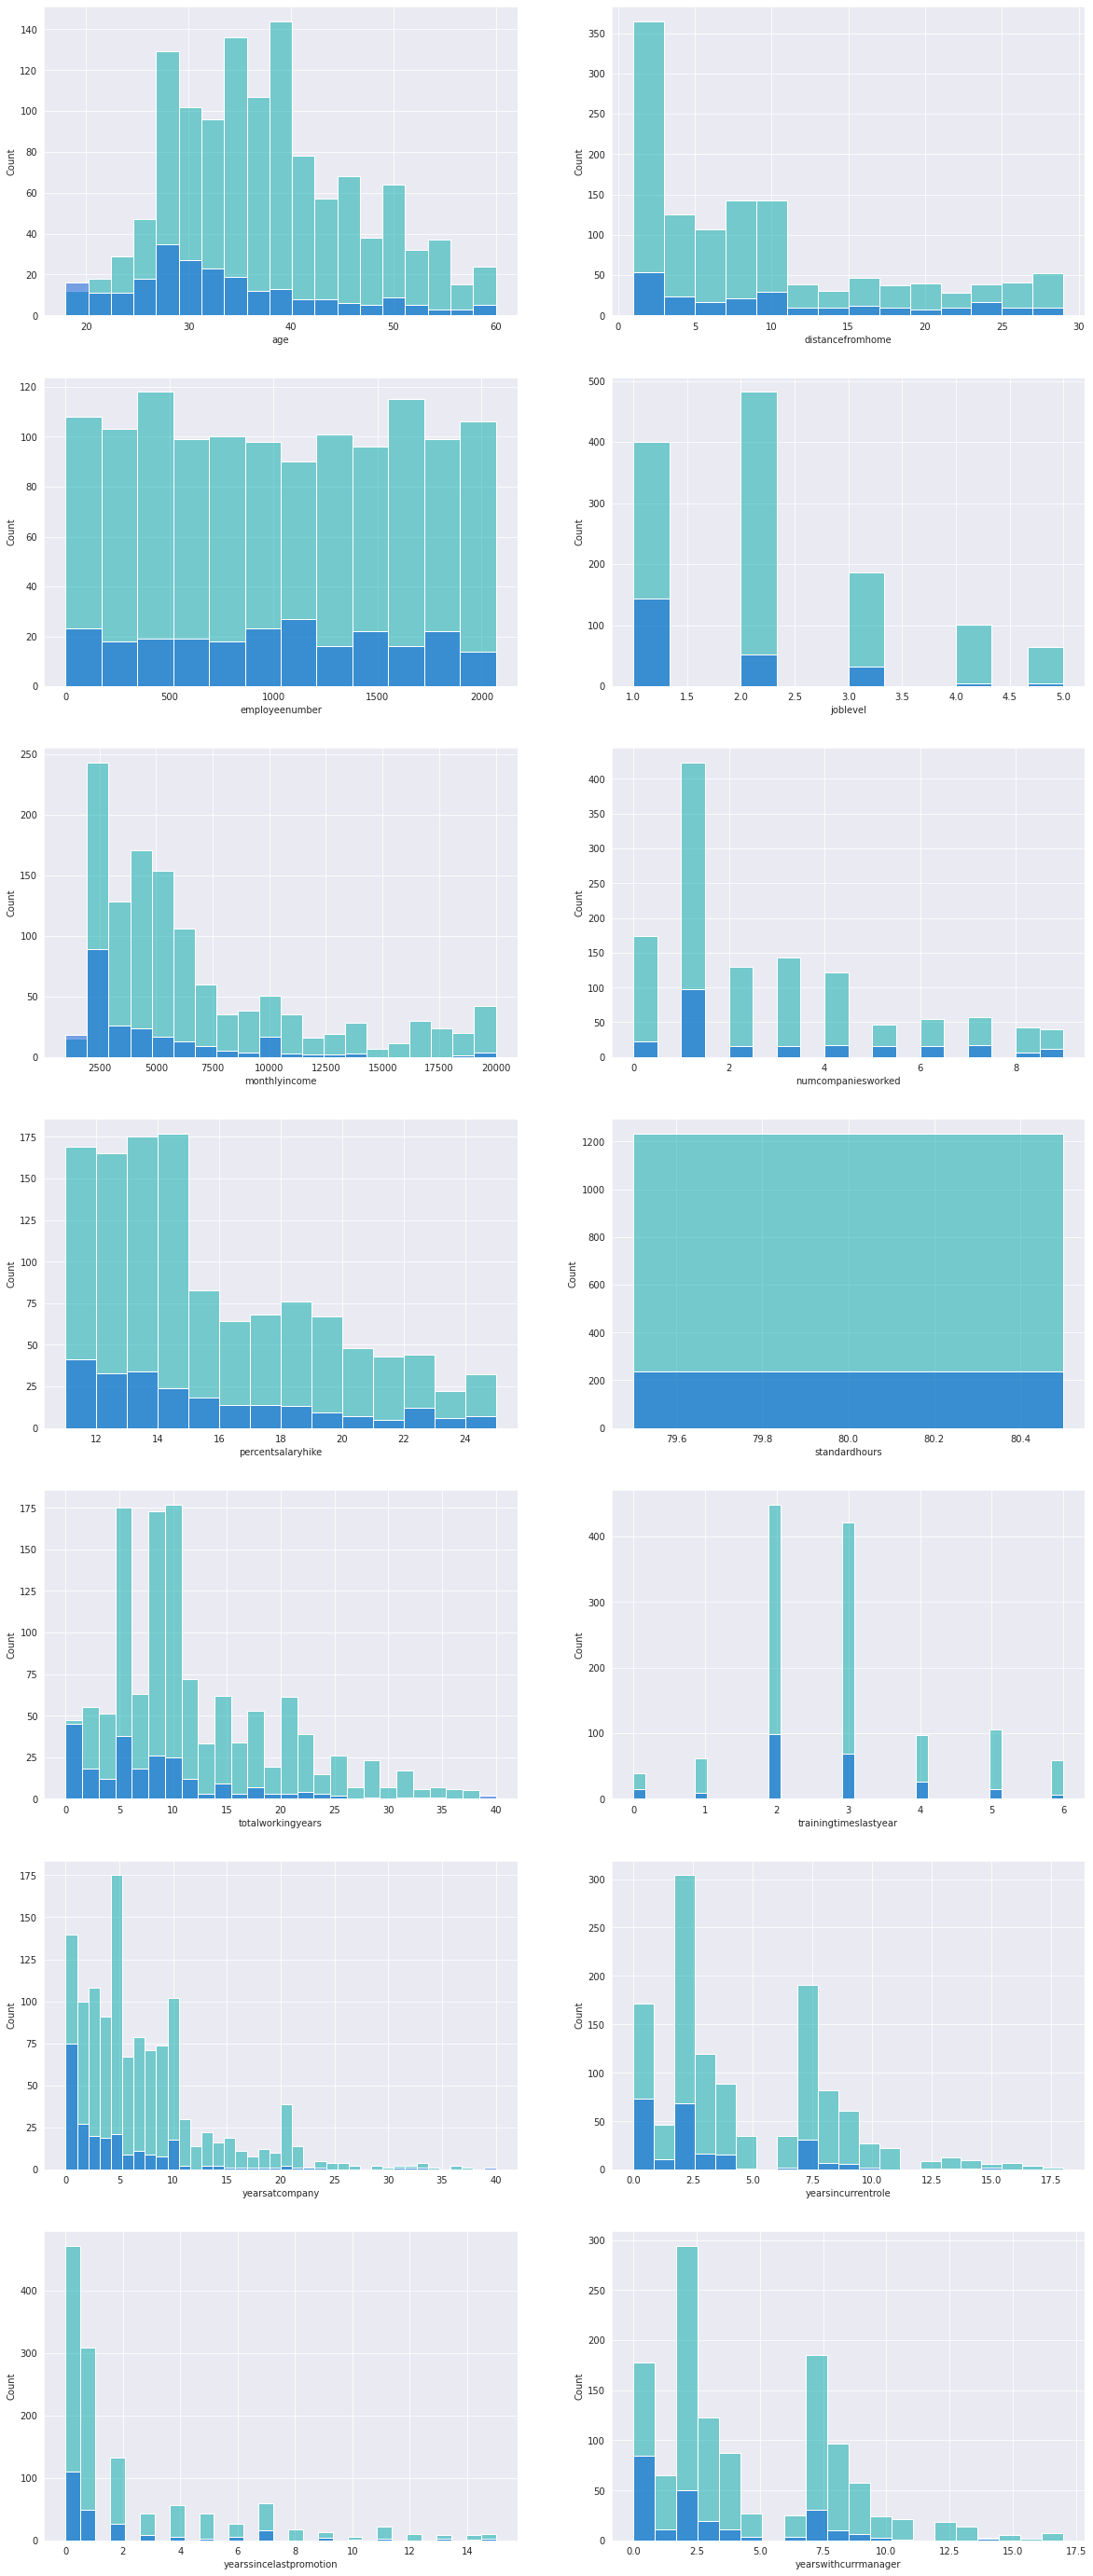

In [23]:
# visualize distribution of numerical data
data = 0

fig, ax = plt.subplots(7,2, figsize=(20,50))
sns.set_style('dark')
ax = ax.flatten()

for i in df.columns[df.dtypes!='object']:
  sns.histplot(data=df,
               x=df[i],
               hue=df['attrition'],
               palette='winter',
               legend=False,
               ax = ax[data]
               );
  
  data=data+1

In [24]:
# droping feature single category and id
df = df.drop(['over18', 'employeenumber', 'standardhours'], axis=1)
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,jobinvolvement,...,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1,41.0,Yes,Travel_Rarely,Sales,1.0,College,Life Sciences,Medium,Female,High,...,11.0,Excellent,Low,8.0,0.0,Bad,6.0,4.0,0.0,5.0
2,49.0,No,Travel_Frequently,Research & Development,8.0,Below College,Life Sciences,High,Male,Medium,...,23.0,Outstanding,Very High,10.0,3.0,Better,10.0,7.0,1.0,7.0
3,37.0,Yes,Travel_Rarely,Research & Development,2.0,College,Other,Very High,Male,Medium,...,15.0,Excellent,Medium,7.0,3.0,Better,0.0,0.0,0.0,0.0
4,33.0,No,Travel_Frequently,Research & Development,3.0,Master,Life Sciences,Very High,Female,High,...,11.0,Excellent,High,8.0,3.0,Better,8.0,7.0,3.0,0.0
5,27.0,No,Travel_Rarely,Research & Development,2.0,Below College,Medical,Low,Male,High,...,12.0,Excellent,Very High,6.0,3.0,Better,2.0,2.0,2.0,2.0


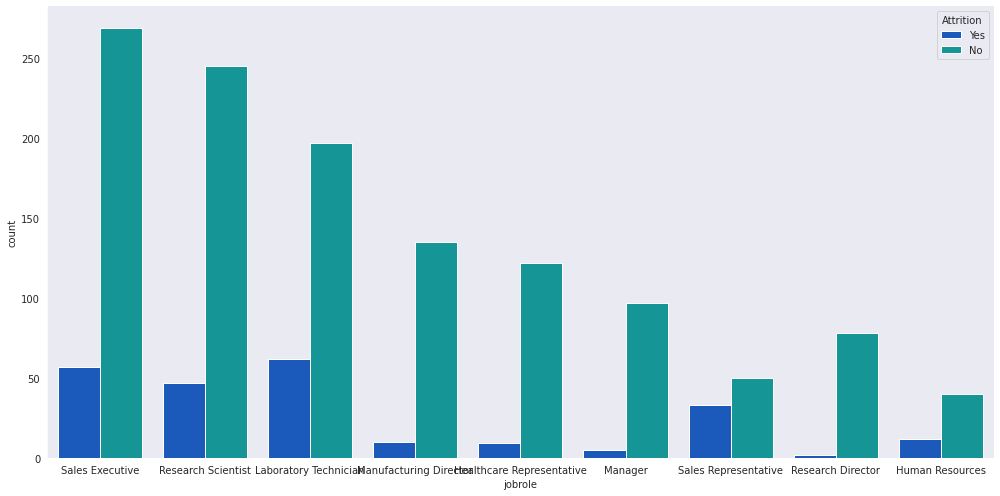

In [25]:
# visualize Job Role by Attrition
sns.catplot(data=df, 
            x='jobrole', 
            hue='attrition', 
            kind='count', 
            height=7, 
            aspect=2, 
            legend=False, 
            palette='winter'
            )
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

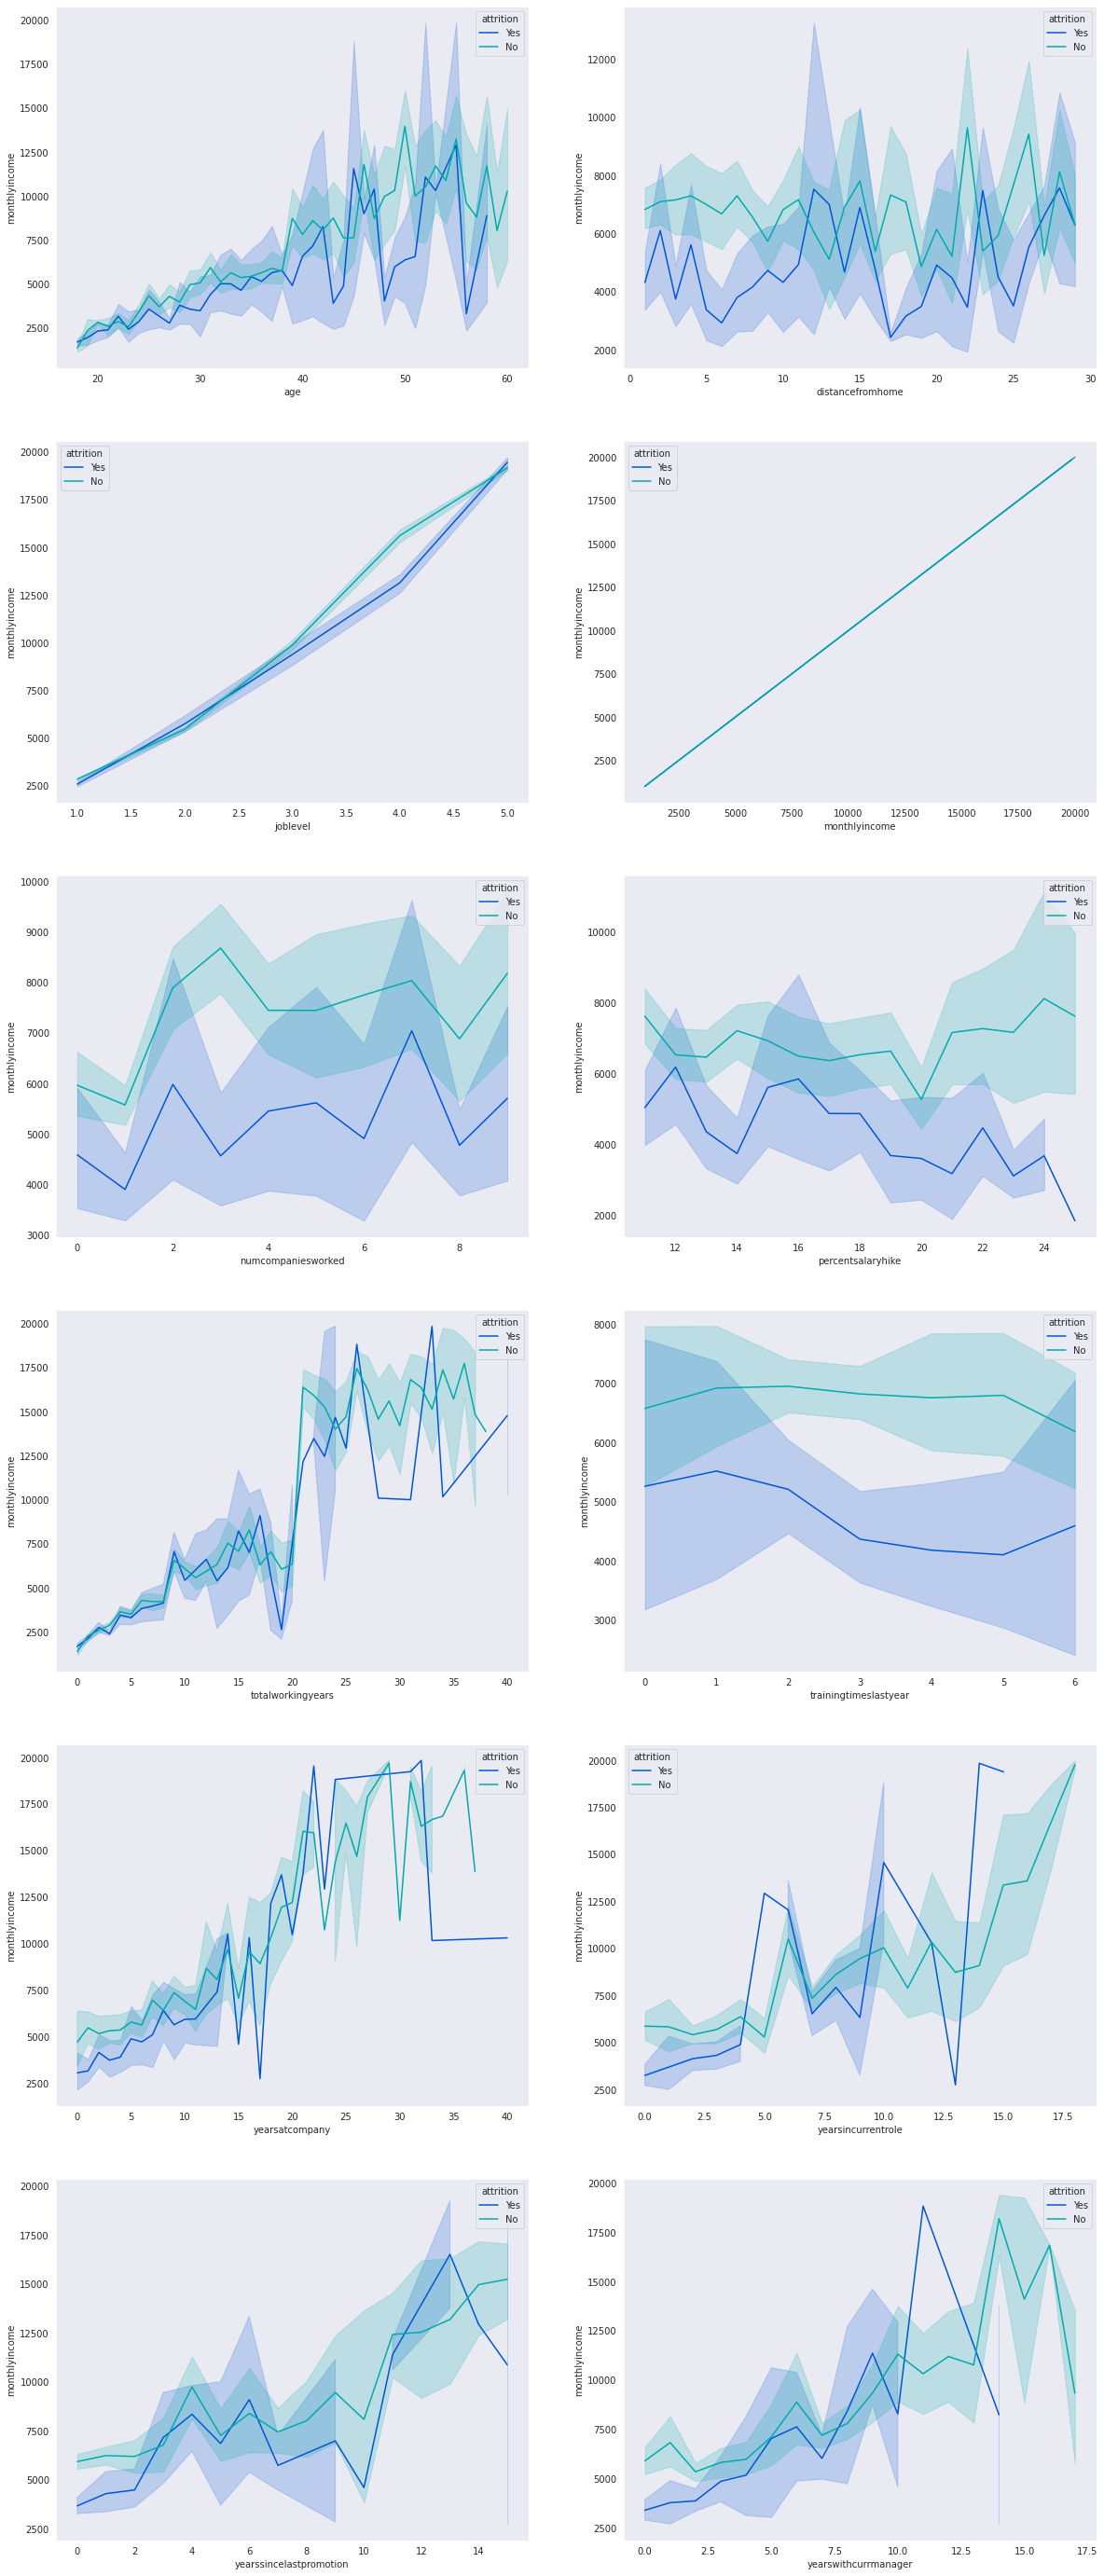

In [26]:
data = 0

fig, ax = plt.subplots(6,2, figsize=(20,50))
ax = ax.flatten()

for i in df.columns[df.dtypes!='object']:
  sns.set_style('darkgrid')
  sns.lineplot(data=df,
               x=df[i],
               y=df['monthlyincome'],
               hue=df['attrition'],  
               palette='winter',
               ax = ax[data]);
  data=data+1

In [27]:
# Transforming data categorical into numerical

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [28]:
# showing the output above
df.dtypes

age                         float64
attrition                      int8
businesstravel                 int8
department                     int8
distancefromhome            float64
education                      int8
educationfield                 int8
environmentsatisfaction        int8
gender                         int8
jobinvolvement                 int8
joblevel                    float64
jobrole                        int8
jobsatisfaction                int8
maritalstatus                  int8
monthlyincome               float64
numcompaniesworked          float64
overtime                       int8
percentsalaryhike           float64
performancerating              int8
relationshipsatisfaction       int8
totalworkingyears           float64
trainingtimeslastyear       float64
worklifebalance                int8
yearsatcompany              float64
yearsincurrentrole          float64
yearssincelastpromotion     float64
yearswithcurrmanager        float64
dtype: object

In [29]:
# summery new dataset
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,jobinvolvement,...,percentsalaryhike,performancerating,relationshipsatisfaction,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1,41.0,1,2,2,1.0,2,1,2,0,0,...,11.0,0,1,8.0,0.0,0,6.0,4.0,0.0,5.0
2,49.0,0,1,1,8.0,1,1,0,1,2,...,23.0,1,3,10.0,3.0,2,10.0,7.0,1.0,7.0
3,37.0,1,2,1,2.0,2,4,3,1,2,...,15.0,0,2,7.0,3.0,2,0.0,0.0,0.0,0.0
4,33.0,0,1,1,3.0,4,1,3,0,0,...,11.0,0,0,8.0,3.0,2,8.0,7.0,3.0,0.0
5,27.0,0,2,1,2.0,1,3,1,1,0,...,12.0,0,3,6.0,3.0,2,2.0,2.0,2.0,2.0


In [30]:
# checking corelation feature by attririon
df.corr()['attrition'].sort_values(ascending=False)

attrition                   1.000000
overtime                    0.246118
maritalstatus               0.162070
distancefromhome            0.077924
jobrole                     0.067151
department                  0.063991
numcompaniesworked          0.043494
gender                      0.029453
educationfield              0.026846
jobinvolvement              0.008467
performancerating           0.002889
businesstravel              0.000074
percentsalaryhike          -0.013478
relationshipsatisfaction   -0.018585
environmentsatisfaction    -0.024461
yearssincelastpromotion    -0.033019
education                  -0.036376
trainingtimeslastyear      -0.059478
worklifebalance            -0.059572
jobsatisfaction            -0.068354
yearsatcompany             -0.134392
yearswithcurrmanager       -0.156199
age                        -0.159205
monthlyincome              -0.159840
yearsincurrentrole         -0.160545
joblevel                   -0.169105
totalworkingyears          -0.171063
N

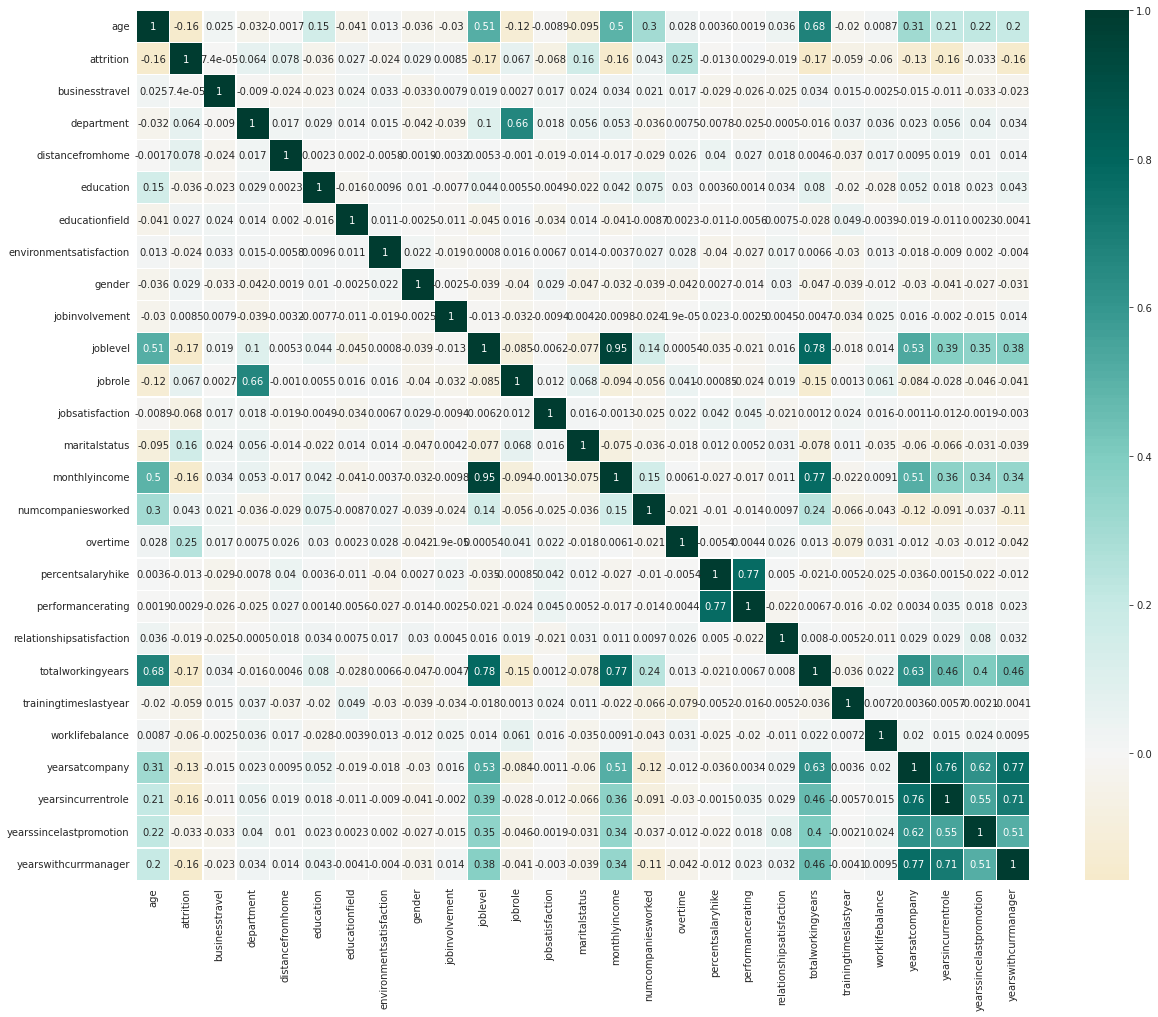

In [31]:
# heatmap diagaram for visualize the corelation
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),
            cmap="BrBG", 
            annot = True, 
            center=0, 
            linewidths=.10);

In [32]:
# Add this codes - display the highest correlation pairs and sort in descending order
stacked_df = df.corr().stack().sort_values(ascending=False)
stacked_df[(stacked_df > 0.7) & (stacked_df < 1)]

joblevel              monthlyincome           0.950300
monthlyincome         joblevel                0.950300
joblevel              totalworkingyears       0.782208
totalworkingyears     joblevel                0.782208
percentsalaryhike     performancerating       0.773550
performancerating     percentsalaryhike       0.773550
monthlyincome         totalworkingyears       0.772893
totalworkingyears     monthlyincome           0.772893
yearswithcurrmanager  yearsatcompany          0.769212
yearsatcompany        yearswithcurrmanager    0.769212
                      yearsincurrentrole      0.758754
yearsincurrentrole    yearsatcompany          0.758754
                      yearswithcurrmanager    0.714365
yearswithcurrmanager  yearsincurrentrole      0.714365
dtype: float64

# Data Processing

In [33]:
# import library imblearn for sampling data

!pip install imblearn
from imblearn import under_sampling, over_sampling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
# make varible X for data feature and Y for label feature
X = df.drop(['attrition'],axis=1)
y = df['attrition']

In [35]:
#apply SelectKBest class to extract scoring feature
# RFE 
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                      Specs          Score
13            monthlyincome  127922.293694
19        totalworkingyears     230.721618
22           yearsatcompany     142.100054
23       yearsincurrentrole     117.522596
25     yearswithcurrmanager     110.671534
0                       age      84.155277
15                 overtime      63.845067
3          distancefromhome      63.772142
9                  joblevel      24.939242
12            maritalstatus      18.745657
10                  jobrole       9.004448
24  yearssincelastpromotion       7.601723
11          jobsatisfaction       6.692900
14       numcompaniesworked       6.438654
4                 education       3.108840


In [36]:
# Drop weakness feature base on score

X = X.drop(['trainingtimeslastyear', 'worklifebalance', 'department',
       'environmentsatisfaction', 'educationfield', 'gender',
       'relationshipsatisfaction', 'percentsalaryhike', 'jobinvolvement',
       'performancerating', 'businesstravel'], axis=1)

In [37]:
# sampling dataset using oversample
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 1233), (1, 1233)] (2466,)


In [38]:
# split dataset 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1972, 15), (494, 15), (1972,), (494,))

# Model Building

In [39]:
# Function to cross validation scoring
# cross validation parameters

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=model, X = X_train, y = y_train, cv = 10)
    return accuracies.mean()

## Logistic Regression

In [40]:
# model logistic regression

model_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# predict accuracy train dataset

pred_val = model_LR.predict(X_train)
accuracy_score(y_train,pred_val)

0.7358012170385395

In [42]:
# testing dataset

model_LR.score(X_test, y_test)

0.694331983805668

In [43]:
# cross validation

logr_cross = cross_val(X_train, y_train, model_LR)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.7266


### Model Evaluation

In [44]:
# model evaluation

predictions=model_LR.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       250
           1       0.68      0.71      0.70       244

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494



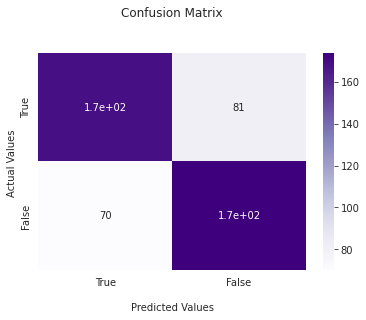

In [45]:
# PRINTING THE CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

## Random Forest

In [46]:
## Random Forest Classification

model_RF = RandomForestClassifier(n_estimators = 10, criterion='entropy', max_depth=10, random_state=42)
model_RF.fit(X_train.values, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=42)

In [47]:
# import time library for importance feature

import time
import numpy as np

start_time = time.time()
importances = model_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.002 seconds


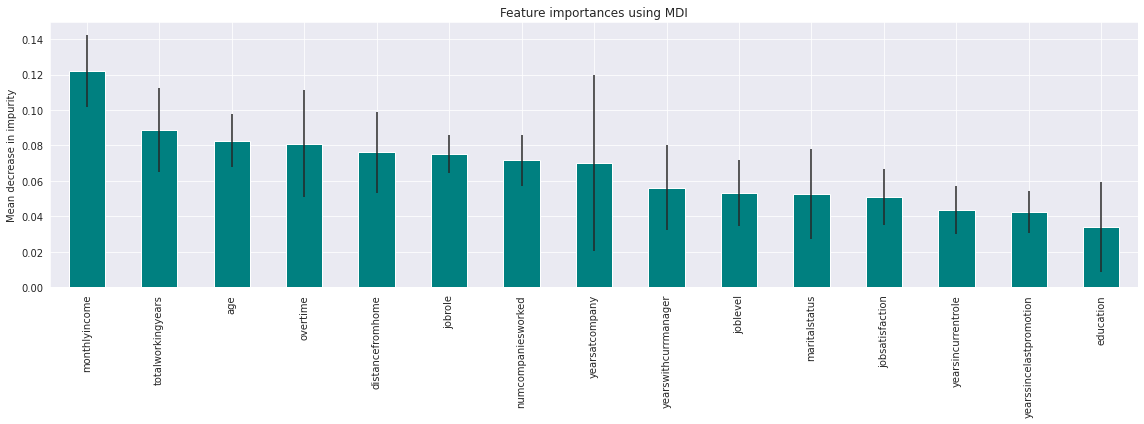

In [48]:
# visualize importance feature

forest_importances = pd.Series(importances, index=X_train.iloc[0].index)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
forest_importances.plot.bar(yerr=std, ax=ax, color='teal')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [49]:
# model Random Forest

pred_val = model_RF.predict(X_train.values)
accuracy_score(y_train,pred_val)

0.9787018255578094

In [50]:
# Random Forest test

model_RF.score(X_test.values, y_test)

0.902834008097166

In [51]:
# Random Forest Cross Validation

predictions = model_RF.predict(X_test.values)
random_cross = cross_val(X_train.values, y_train, model_RF)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9295


### Model Evaluation

In [52]:
# model evaluation
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       250
           1       0.89      0.91      0.90       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



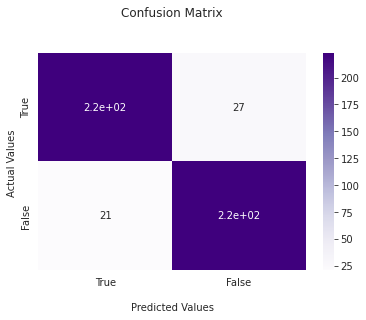

In [53]:
# PRINTING THE CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

### Save Model into Pickle

In [54]:
import pickle

filename = 'model_RF.pkl'
pickle.dump(model_RF, open(filename, 'wb'))

## Naive Bayes

In [55]:
# NaiveBayes Model
model_NB = GaussianNB()
model_naive = model_NB.fit(X_train, y_train)

In [56]:
# Model predict train
pred_val = model_NB.predict(X_train)
accuracy_score(y_train,pred_val)

0.646551724137931

In [57]:
# Model test

model_NB.score(X_test, y_test)

0.6194331983805668

In [58]:
# Cross Validation NaiveBayes

model_NB_cross = cross_val(X_train, y_train, model_NB)
print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % model_NB_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.6465


### Cross Validation

In [59]:
#getting the predictions...
predictions=model_NB.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       250
           1       0.59      0.74      0.66       244

    accuracy                           0.62       494
   macro avg       0.63      0.62      0.61       494
weighted avg       0.63      0.62      0.61       494



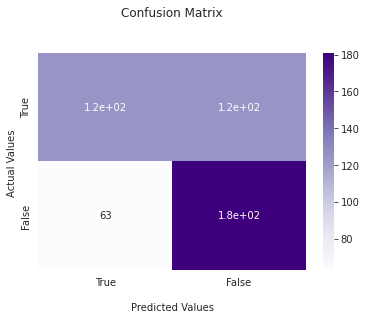

In [60]:
# PRINTING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

## DecisionTree

In [61]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()
model_Tree = model_DT.fit(X_train, y_train)

# Model predict train
pred_val = model_DT.predict(X_train)
accuracy_score(y_train,pred_val)

1.0

In [62]:
# model predict test
model_DT.score(X_test, y_test)

0.6760655737704919

In [63]:
# cross validation Decision Tree

cross_val_DT = cross_val(X_train, y_train, model_LR)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % cross_val_DT)

Logistic Regression Performance on the test set: Cross Validation Score = 0.7266


In [64]:
# get importance
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10278
Feature: 1, Score: 0.05092
Feature: 2, Score: 0.02459
Feature: 3, Score: 0.01700
Feature: 4, Score: 0.07709
Feature: 5, Score: 0.05180
Feature: 6, Score: 0.08065
Feature: 7, Score: 0.15128
Feature: 8, Score: 0.05822
Feature: 9, Score: 0.10537
Feature: 10, Score: 0.09826
Feature: 11, Score: 0.06613
Feature: 12, Score: 0.03454
Feature: 13, Score: 0.03966
Feature: 14, Score: 0.04170


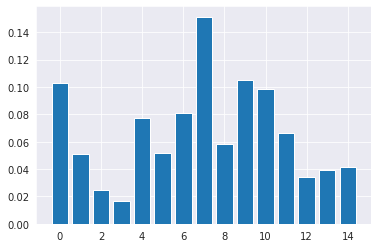

In [65]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Model Evaluation

In [66]:
#getting the predictions...

predictions=model_DT.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       250
           1       0.87      0.98      0.92       244

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494



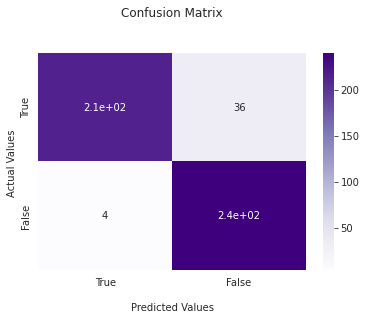

In [67]:
# PRINTING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

# Model Evaluation & Testing

Model Comparison


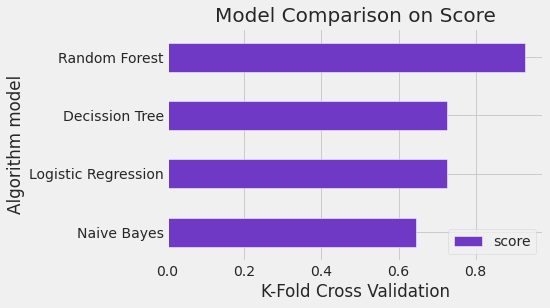

In [68]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

plt.style.use('fivethirtyeight')
figsize=(16, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest',
                                           'Naive Bayes', 'Decission Tree'],
                                 'score': [logr_cross, random_cross, model_NB_cross, cross_val_DT]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = '#6F38C5', edgecolor = 'white')

# Plot formatting
plt.ylabel('Algorithm model'); 
plt.yticks(size = 14); 
plt.xlabel('K-Fold Cross Validation'); 
plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

Model Testing

In [69]:
# import library lime for testing 

!pip install lime

In [70]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1],
    mode='classification'
)

In [80]:
# Display data from row 5

X_test.iloc[5]

age                          44.0
distancefromhome              3.0
education                     0.0
joblevel                      1.0
jobrole                       2.0
jobsatisfaction               1.0
maritalstatus                 1.0
monthlyincome              2362.0
numcompaniesworked            4.0
overtime                      0.0
totalworkingyears            10.0
yearsatcompany                3.0
yearsincurrentrole            2.0
yearssincelastpromotion       1.0
yearswithcurrmanager          2.0
Name: 1956, dtype: float64

In [73]:
# model score and explanation

exp = explainer.explain_instance(
    data_row=X_test.iloc[0], 
    predict_fn=model_RF.predict_proba,
    num_features=10,
)

exp.show_in_notebook(show_table=True)